# A diabetes estimator project

Download the dataset from - https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1

In [7]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
diabetes = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/tensorflow/diabetes.csv")

In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning/Normalizing the data

In [11]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
cols_to_norm = (['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction'])

In [0]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


# Working with the estimator API

## Creating the features columns

In [0]:
import tensorflow as tf

In [16]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
pregnancies = tf.feature_column.numeric_column('Pregnancies')
glucose = tf.feature_column.numeric_column('Glucose')
blood_pressure = tf.feature_column.numeric_column('BloodPressure')
skin_thickness = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree_function = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age = tf.feature_column.numeric_column('Age')

## Dealing with the categorical values

Two ways -
1. Vocabulary list
2. Hask bucket

In [0]:
# Working with named string categories
# assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [0]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size = 10)

## Converting a continuous column to categorical values

This idea is called feature engineering

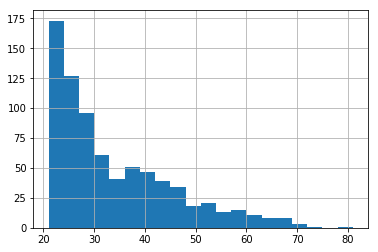

In [21]:
diabetes['Age'].hist(bins = 20)

In [0]:
age_bucket = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])

In [0]:
feature_cols = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age_bucket]

## Train test split

In [0]:
X = diabetes.drop('Outcome', axis = 1)

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [0]:
y = diabetes['Outcome']

In [28]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

## Creating the input function

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [32]:
model = tf.estimator.LinearClassifier(feature_columns = feature_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5mdjt5r1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4819ffd320>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [33]:
model.train(input_fn = input_func, steps = 1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp5mdjt5r1/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 287.461
INFO:tensorflow:loss = 7.1745996, step = 101 (0.357 sec)
INFO:tensorflow:global_step/sec: 421.264
INFO:tensorflow:loss = 6.4174976, step = 201 (0.237 sec)
INFO:tensorflow:global_step/sec: 

In [0]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [35]:
results = model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-21T17:11:30Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmp5mdjt5r1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-21-17:11:30
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.73593074, accuracy_baseline = 0.64935064, auc = 0.792963, auc_precision_recall = 0.6382063, average_loss = 0.52936035, global_step = 1000, label/mean = 0.35064936, loss = 5.0950933, precision = 0.6515151, prediction/mean = 0.36216137, recall = 0.5308642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp5mdjt5r1/model.ckpt-1000


In [36]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.792963,
 'auc_precision_recall': 0.6382063,
 'average_loss': 0.52936035,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0950933,
 'precision': 0.6515151,
 'prediction/mean': 0.36216137,
 'recall': 0.5308642}

In [0]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [0]:
predictions = model.predict(pred_input_func)

In [39]:
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp5mdjt5r1/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [40]:
my_pred

[{'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.4993503], dtype=float32),
  'logits': array([-0.00259876], dtype=float32),
  'probabilities': array([0.5006497, 0.4993503], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6176728], dtype=float32),
  'logits': array([0.4796821], dtype=float32),
  'probabilities': array([0.38232723, 0.6176728 ], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.39298245], dtype=float32),
  'logits': array([-0.43479282], dtype=float32),
  'probabilities': array([0.6070176 , 0.39298242], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.29674813], dtype=float32),
  'logits': array([-0.8628315], dtype=float32),
  'probabilities': array([0.7032519, 0.2967481], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=objec

# Creating a dense neural network classifier

In [41]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feature_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwxndg389', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4814031be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Note -

The dnn model could not be directly trained as earlier due to the categorical variables. We need to wrap the categorical variables in an embedded column.

In [0]:
# embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension = 4)

In [0]:
feature_cols = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age_bucket]

In [0]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

In [45]:
dnn_model = tf.estimator.DNNClassifier(hidden_units = [10, 10, 10], feature_columns = feature_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpz16rtn0b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f4814031668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
dnn_model.train(input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpz16rtn0b/model.ckpt.
INFO:tensorflow:loss = 7.0067024, step = 1
INFO:tensorflow:global_step/sec: 310.213
INFO:tensorflow:loss = 5.5827355, step = 101 (0.337 sec)
INFO:tensorflow:global_step/sec: 394.575
INFO:tensorflow:loss = 5.6260324, step = 201 (0.253 sec)
INFO:tensorflow:global_step/sec: 397.08
INFO:tensorflow:loss = 5.461833, step = 301 (0.242 sec)
INFO:tensorflow:global_step/sec: 360.081
INFO:tensorflow:loss = 5.9337425, step = 401 (0.280 sec)
INFO:tensorflow:global_step/sec: 223.887
INFO:tensorflow:loss = 4.818744, step = 501 (0.445 sec)
INFO:tensorflow:global_step/sec: 397.225
INFO:tensorflow:loss = 6.894951, step = 601 (0.252 sec)
INFO:tensorflow:global_step/sec: 384.707
INFO:tensorflow:loss

In [0]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [48]:
dnn_model.evaluate(test_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-21T17:27:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpz16rtn0b/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-21-17:27:46
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.75757575, accuracy_baseline = 0.64935064, auc = 0.8034568, auc_precision_recall = 0.7050165, average_loss = 0.5064085, global_step = 1000, label/mean = 0.35064936, loss = 4.874182, precision = 0.6760563, prediction/mean = 0.31094927, recall = 0.5925926
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpz16rtn0b/model.ckpt-1000


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8034568,
 'auc_precision_recall': 0.7050165,
 'average_loss': 0.5064085,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.874182,
 'precision': 0.6760563,
 'prediction/mean': 0.31094927,
 'recall': 0.5925926}